In [2]:
import ROOT
infile=ROOT.TFile.Open("/gpfs/mnt/atlasgpfs01/usatlas/data/pusharma/vhbb/stxs_uncertainity/inputs/hadded_nominal_noreco_06062024.root")
infile_alt=ROOT.TFile.Open("/gpfs/mnt/atlasgpfs01/usatlas/data/pusharma/vhbb/stxs_uncertainity/inputs/hadded_alternative_noreco_06062024.root")
# infile=ROOT.TFile.Open("/gpfs/mnt/atlasgpfs01/usatlas/data/pusharma/vhbb/stxs_uncertainity/inputs/hadded_noReco_25032024.root")
# infile_alt=ROOT.TFile.Open("/gpfs/mnt/atlasgpfs01/usatlas/data/pusharma/vhbb/stxs_uncertainity/inputs/hadded_alternative_noReco_18032024.root")


h0_name='ggZllH125_Stage1Bin_RecoMapEPSNicest'
hists=['ggZvvH125_Stage1Bin_RecoMapEPSNicest','qqWlvH125_Stage1Bin_RecoMapEPSNicest','qqZllH125_Stage1Bin_RecoMapEPSNicest','qqZvvH125_Stage1Bin_RecoMapEPSNicest']

fwdh_dict={
    'ggZllH125_Stage1Bin_RecoMapEPSNicest':'GG2HLL_FWDH',
    'ggZvvH125_Stage1Bin_RecoMapEPSNicest':'GG2HNUNU_FWDH',
    'qqWlvH125_Stage1Bin_RecoMapEPSNicest':'QQ2HLNU_FWDH',
    'qqZllH125_Stage1Bin_RecoMapEPSNicest':'QQ2HLL_FWDH',
    'qqZvvH125_Stage1Bin_RecoMapEPSNicest':'QQ2HNUNU_FWDH'
}


temp=infile_alt.Get(f'{h0_name}')
bin = temp.GetXaxis().FindBin("TOTAL")  # Find the bin with label "Total"
content = temp.GetBinContent(bin)  # Get the content of the bin
temp.SetBinContent(bin,0)
bin_FWDH = temp.GetXaxis().FindBin(fwdh_dict[f'{h0_name}'])  # Find the bin with label "Total"
content_FWDH=temp.GetBinContent(bin_FWDH)
# temp.SetBinContent(bin_FWDH,0)

nom_integral= infile.Get(f'{h0_name}')
bin = nom_integral.GetXaxis().FindBin("TOTAL")  # Find the bin with label "Total"
bin_FWDH = nom_integral.GetXaxis().FindBin(fwdh_dict[f'{h0_name}'])  # Find the bin with label "Total"
nom_integral.SetBinContent(bin,0)
# nom_integral.SetBinContent(bin_FWDH,0)
temp.Scale(nom_integral.Integral()/temp.Integral())
hist_alt=temp.Clone()
del temp




for i in hists:
    temp=infile_alt.Get(f'{i}')
    bin = temp.GetXaxis().FindBin("TOTAL")  # Find the bin with label "Total"
    content = temp.GetBinContent(bin)  # Get the content of the bin
    temp.SetBinContent(bin,0)
    bin_FWDH = temp.GetXaxis().FindBin(fwdh_dict[f'{i}'])  # Find the bin with label "Total"
    # temp.SetBinContent(bin_FWDH,0)
    nom_integral= infile.Get(f'{i}')
    bin_FWDH = nom_integral.GetXaxis().FindBin(fwdh_dict[f'{i}'])  # Find the bin with label "Total"
    bin = nom_integral.GetXaxis().FindBin("TOTAL")  # Find the bin with label "Total"
    nom_integral.SetBinContent(bin,0)
    # nom_integral.SetBinContent(bin_FWDH,0)
    temp.Scale(nom_integral.Integral()/temp.Integral())
    hist_alt.Add(temp)
    del temp


hist_nom=infile.Get(f'{h0_name}').Clone()
for i in hists:
    hist_nom.Add(infile.Get(f'{i}'))


def getXS(sigName):
  if sigName == 'QQ2HLNU': return 0.46227
  elif sigName == 'QQ2HLL' : return 0.07704
  elif sigName == 'GG2HLL' : return 0.01242
  elif sigName == 'QQ2HNUNU' : return 0.15305
  elif sigName == 'GG2HNUNU' : return 0.02457
  
signals = ['QQ2HLNU','QQ2HLL','QQ2HNUNU','GG2HLL','GG2HNUNU']

groupings={'QQZH':['QQ2HLL','QQ2HNUNU'],
           'GGZH':['GG2HLL','GG2HNUNU'],
           'WH':['QQ2HLNU']}


# max_split=[ '_PTV_0_75_0J', '_PTV_0_75_1J', '_PTV_0_75_GE2J', '_PTV_75_150_0J', '_PTV_75_150_1J', '_PTV_75_150_GE2J', '_PTV_150_250_0J', '_PTV_150_250_1J', '_PTV_150_250_GE2J', '_PTV_250_400_0J', '_PTV_250_400_1J', '_PTV_250_400_GE2J', '_PTV_400_600_0J', '_PTV_400_600_1J', '_PTV_400_600_GE2J', '_PTV_GT600_0J', '_PTV_GT600_1J', '_PTV_GT600_GE2J','_FWDH']
max_split_old=[ '_PTV_0_75_0J', '_PTV_0_75_1J', '_PTV_0_75_GE2J', '_PTV_75_150_0J', '_PTV_75_150_1J', '_PTV_75_150_GE2J', '_PTV_150_250_0J', '_PTV_150_250_1J', '_PTV_150_250_GE2J', '_PTV_250_400_0J', '_PTV_250_400_1J', '_PTV_250_400_GE2J', '_PTV_400_600_0J', '_PTV_400_600_1J', '_PTV_400_600_GE2J', '_PTV_GT600_0J', '_PTV_GT600_1J', '_PTV_GT600_GE2J','_FWDH']
max_split_new=[ '_0_75PTV_0J', '_0_75PTV_1J', '_0_75PTV_GE2J', '_75_150PTV_0J', '_75_150PTV_1J', '_75_150PTV_GE2J', '_150_250PTV_0J', '_150_250PTV_1J', '_150_250PTV_GE2J', '_250_400PTV_0J', '_250_400PTV_1J', '_250_400PTV_GE2J', '_400_600PTV_0J', '_400_600PTV_1J', '_400_600PTV_GE2J', '_GT600PTV_0J', '_GT600PTV_1J', '_GT600PTV_GE2J','_FWDH']
max_split=max_split_new
mapping_dict = {old: new for old, new in zip(max_split_old, max_split_new)}

hist_unc=hist_nom.Clone()

for i in range(1, hist_nom.GetNbinsX()+1):
    if hist_nom.GetBinContent(i) == 0:
        hist_unc.SetBinContent(i,0.0)
        hist_unc.SetBinError(i,0.0)
    else:
        print(hist_nom.GetXaxis().GetBinLabel(i),'Nominal Content:',hist_nom.GetBinContent(i),'Alternative Content:',hist_alt.GetBinContent(i),'1 - ratio:', - 1 + hist_alt.GetBinContent(i)/hist_nom.GetBinContent(i))
        hist_unc.SetBinContent(i,-1 + hist_alt.GetBinContent(i)/hist_nom.GetBinContent(i))
        print(hist_unc.GetBinContent(i))
        hist_unc.SetBinError(i,0.0)
        
f = ROOT.TFile("CheckPS.root", "RECREATE")
hist_unc.SetName("PSUncertainty")
hist_unc.Write()
hist_nom.SetName("nomYields")
hist_nom.Write()
hist_alt.SetName("altYields")
hist_alt.Write()
f.Close()

QQ2HNUNU_FWDH Nominal Content: 1409.9612358037425 Alternative Content: 1417.9937337690428 1 - ratio: 0.005696963690438928
0.005696963690438928
QQ2HNUNU_PTV_0_75_0J Nominal Content: 3935.7026571746155 Alternative Content: 4025.3238986483043 1 - ratio: 0.022771344606105526
0.022771344606105526
QQ2HNUNU_PTV_0_75_1J Nominal Content: 1222.5819596869576 Alternative Content: 1159.2025429086445 1 - ratio: -0.05184062816904422
-0.05184062816904422
QQ2HNUNU_PTV_0_75_GE2J Nominal Content: 523.5095241700749 Alternative Content: 500.28767097491834 1 - ratio: -0.044358033852336054
-0.044358033852336054
QQ2HNUNU_PTV_75_150_0J Nominal Content: 2357.7012594630532 Alternative Content: 2422.7481694200233 1 - ratio: 0.02758912296284044
0.02758912296284044
QQ2HNUNU_PTV_75_150_1J Nominal Content: 957.1229277314019 Alternative Content: 906.6532899575636 1 - ratio: -0.05273057024499739
-0.05273057024499739
QQ2HNUNU_PTV_75_150_GE2J Nominal Content: 487.58096252289477 Alternative Content: 467.6169006641263 1 - 

In [3]:
# grouping = {
# 'ZHx75x150PTVx0J':{ "QQ2HLLxPTVx75x150x0J", "QQ2HNUNUxPTVx75x150x0J", "GG2HLLxPTVx75x150x0J", "GG2HNUNUxPTVx75x150x0J", },
# 'ZHx75x150PTVxGE1J':{ "QQ2HLLxPTVx75x150x1J", "QQ2HLLxPTVx75x150xGE2J", "QQ2HNUNUxPTVx75x150x1J", "QQ2HNUNUxPTVx75x150xGE2J", "GG2HLLxPTVx75x150x1J", "GG2HLLxPTVx75x150xGE2J", "GG2HNUNUxPTVx75x150x1J", "GG2HNUNUxPTVx75x150xGE2J", },
# 'ZHx150x250PTVx0J':{ "QQ2HLLxPTVx150x250x0J", "QQ2HNUNUxPTVx150x250x0J", "GG2HLLxPTVx150x250x0J", "GG2HNUNUxPTVx150x250x0J", },
# 'ZHx150x250PTVxGE1J':{ "QQ2HLLxPTVx150x250x1J", "QQ2HLLxPTVx150x250xGE2J", "QQ2HNUNUxPTVx150x250x1J", "QQ2HNUNUxPTVx150x250xGE2J", "GG2HLLxPTVx150x250x1J", "GG2HLLxPTVx150x250xGE2J", "GG2HNUNUxPTVx150x250x1J", "GG2HNUNUxPTVx150x250xGE2J", },
# 'ZHx250x400PTVx0J':{ "QQ2HLLxPTVx250x400x0J", "QQ2HNUNUxPTVx250x400x0J", "GG2HLLxPTVx250x400x0J", "GG2HNUNUxPTVx250x400x0J", },
# 'ZHx250x400PTVxGE1J':{ "QQ2HLLxPTVx250x400x1J", "QQ2HLLxPTVx250x400xGE2J", "QQ2HNUNUxPTVx250x400x1J", "QQ2HNUNUxPTVx250x400xGE2J", "GG2HLLxPTVx250x400x1J", "GG2HLLxPTVx250x400xGE2J", "GG2HNUNUxPTVx250x400x1J", "GG2HNUNUxPTVx250x400xGE2J", },
# 'ZHx400x600PTV':{ "QQ2HLLxPTVx400x600x0J", "QQ2HLLxPTVx400x600x1J", "QQ2HLLxPTVx400x600xGE2J", "QQ2HNUNUxPTVx400x600x0J", "QQ2HNUNUxPTVx400x600x1J", "QQ2HNUNUxPTVx400x600xGE2J", "GG2HLLxPTVx400x600x0J", "GG2HLLxPTVx400x600x1J", "GG2HLLxPTVx400x600xGE2J", "GG2HNUNUxPTVx400x600x0J", "GG2HNUNUxPTVx400x600x1J", "GG2HNUNUxPTVx400x600xGE2J", },
# 'ZHxGT600PTV':{ "QQ2HLLxPTVxGT600x0J", "QQ2HLLxPTVxGT600x1J", "QQ2HLLxPTVxGT600xGE2J", "QQ2HNUNUxPTVxGT600x0J", "QQ2HNUNUxPTVxGT600x1J", "QQ2HNUNUxPTVxGT600xGE2J", "GG2HLLxPTVxGT600x0J", "GG2HLLxPTVxGT600x1J", "GG2HLLxPTVxGT600xGE2J", "GG2HNUNUxPTVxGT600x0J", "GG2HNUNUxPTVxGT600x1J", "GG2HNUNUxPTVxGT600xGE2J", },
# 'WHx75x150PTV':{ "QQ2HLNUxPTVx75x150x0J", "QQ2HLNUxPTVx75x150x1J", "QQ2HLNUxPTVx75x150xGE2J", },
# 'WHx150x250PTVx0J':{ "QQ2HLNUxPTVx150x250x0J", },
# 'WHx150x250PTVxGE1J':{ "QQ2HLNUxPTVx150x250x1J", "QQ2HLNUxPTVx150x250xGE2J", },
# 'WHx250x400PTVx0J':{ "QQ2HLNUxPTVx250x400x0J", },
# 'WHx250x400PTVxGE1J':{ "QQ2HLNUxPTVx250x400x1J", "QQ2HLNUxPTVx250x400xGE2J", },
# 'WHx400x600PTV':{ "QQ2HLNUxPTVx400x600x0J", "QQ2HLNUxPTVx400x600x1J", "QQ2HLNUxPTVx400x600xGE2J", },
# 'WHxGT600PTV':{ "QQ2HLNUxPTVxGT600x0J", "QQ2HLNUxPTVxGT600x1J", "QQ2HLNUxPTVxGT600xGE2J", } }
grouping = {
'ZHx75x150PTVx0J':{ "QQZHx75x150PTVx0J", "GGZHx75x150PTVx0J", },
'ZHx75x150PTVxGE1J':{ "QQZHx75x150PTVx1J", "QQZHx75x150PTVxGE2J", "GGZHx75x150PTVx1J", "GGZHx75x150PTVxGE2J", },
'ZHx150x250PTVx0J':{ "QQZHx150x250PTVx0J", "GGZHx150x250PTVx0J", },
'ZHx150x250PTVxGE1J':{"QQZHx150x250PTVx1J", "QQZHx150x250PTVxGE2J", "GGZHx150x250PTVx1J", "GGZHx150x250PTVxGE2J", },
'ZHx250x400PTVx0J':{ "QQZHx250x400PTVx0J", "GGZHx250x400PTVx0J", },
'ZHx250x400PTVxGE1J':{ "QQZHx250x400PTVx1J", "QQZHx250x400PTVxGE2J", "QQZHx250x400PTVx1J", "QQZHx250x400PTVxGE2J", "GGZHx250x400PTVx1J", "GGZHx250x400PTVxGE2J", "GGZHx250x400PTVx1J", "GGZHx250x400PTVxGE2J", },
'ZHx400x600PTV':{ "QQZHx400x600PTVx0J", "QQZHx400x600PTVx1J", "QQZHx400x600PTVxGE2J", "GGZHx400x600PTVx0J", "GGZHx400x600PTVx1J", "GGZHx400x600PTVxGE2J", },
'ZHxGT600PTV':{ "QQZHxGT600PTVx0J", "QQZHxGT600PTVx1J", "QQZHxGT600PTVxGE2J", "GGZHxGT600PTVx0J", "GGZHxGT600PTVx1J", "GGZHxGT600PTVxGE2J", },
'WHx75x150PTV':{ "QQWHx75x150PTVx0J", "QQWHx75x150PTVx1J", "QQWHx75x150PTVxGE2J", },
'WHx150x250PTVx0J':{ "QQWHx150x250PTVx0J", },
'WHx150x250PTVxGE1J':{ "QQWHx150x250PTVx1J", "QQWHx150x250PTVxGE2J", },
'WHx250x400PTVx0J':{ "QQWHx250x400PTVx0J", },
'WHx250x400PTVxGE1J':{ "QQWHx250x400PTVx1J", "QQWHx250x400PTVxGE2J", },
'WHx400x600PTV':{ "QQWHx400x600PTVx0J", "QQWHx400x600PTVx1J", "QQWHx400x600PTVxGE2J", },
'WHxGT600PTV':{ "QQWHxGT600PTVx0J", "QQWHxGT600PTVx1J", "QQWHxGT600PTVxGE2J", } }


unc_hist_dict={}
for i in range(1,hist_unc.GetNbinsX()):
    unc_hist_dict[hist_unc.GetXaxis().GetBinLabel(i).replace('_','x')]=hist_unc.GetBinContent(i)


In [4]:

fxs = ROOT.TFile("/gpfs/mnt/atlasgpfs01/usatlas/data/pusharma/vhbb/stxs_uncertainity/vhbbstxstoolkit_run2_legacy/Initial_XS_ade.root", "READ")
debug=False
def createXSLookupTable(h, groupDic):
    xsDic = {}
    for key, value in groupDic.items():
        tmpXS = 0.0
        for val in value: 
            xsDic[val] = getCrossSection(h, val) #fill individual
            tmpXS+= getCrossSection(h, val)
        xsDic[key] = tmpXS #fill the group
    return xsDic
def getCrossSection(h, name):
    name = name.replace('x','_')
    tmpXS = 0.0
    if "QQZH" in name:
        name = name.replace('QQZH','QQ2HLL')
        tmpXS = getContentByLabel(h, name)
        name = name.replace('QQ2HLL','QQ2HNUNU')
        tmpXS += getContentByLabel(h, name)
    elif "GGZH" in name:
        name = name.replace('GGZH','GG2HLL')
        tmpXS = getContentByLabel(h, name)
        name = name.replace('GG2HLL','GG2HNUNU')
        tmpXS += getContentByLabel(h, name)
    else:
        tmpXS = getContentByLabel(h, name)
    return tmpXS
def getContentByLabel(h, name):
    if debug:
        print("Getting histogram: %s"%name)
    for iBin in range(1, h.GetNbinsX()+1):
        if name == h.GetXaxis().GetBinLabel(iBin):
            return h.GetBinContent(iBin)
    return -1


hXS = fxs.Get("Initial")
xsLookup = createXSLookupTable(hXS, grouping)

def getBinNrByLabel(h, name):
    for iBin in range(1, h.GetNbinsX()+1):
        if name == h.GetXaxis().GetBinLabel(iBin):
            return iBin
    return -1

def fillDic(h, name, dic, xsDic):
    uncName = "SysTheoryPS"
    if uncName in list(dic.keys()):
        dic[uncName] += h[name]*xsDic[name]
    else:
        dic[uncName] = h[name]*xsDic[name]

def scaleDic(uncDic, xsDic, groupName):
    for key, value in uncDic.items():
        uncDic[key] = value/xsDic[groupName]

def getGroupUncertainties(uncDic, groupDic, xsDic):
    bigDic = {}
    #which groups do we need?
    for key, value in groupDic.items():
        if debug:
            print("Group: %s"%key)
        tmpDic = {}
        for val in value:
            # print(val)
            if debug:
                print("-->getting unc. for %s"%val)
            if "QQWH" in val:
                htmp = uncDic["WH"]
            elif "QQZH" in val or "QQ2HLL" in val or "QQ2HNUNU" in val:
                htmp = uncDic["QQZH"]
            elif "GGZH" in val or "GG2HLL" in val or "GG2HNUNU" in val:
                htmp = uncDic["GGZH"]
            fillDic(htmp, val, tmpDic, xsDic)

        scaleDic(tmpDic, xsDic, key)
        bigDic[key] = tmpDic

    return bigDic




#2.2) loop over XS histograms
#----helper fkts
def calculateAndSaveResidual(h, groupDic, grUncDic):
    hnew = h.Clone()
    nBx = hnew.GetNbinsX()
    print(nBx)
    nBy = hnew.GetNbinsY()
    for iBy in range(1, nBy+1): 
        for iBx in range(1, nBx+1):
            uncName = 'SysTheoryPS'
            binName = hnew.GetXaxis().GetBinLabel(iBx)
            print(binName)
            delta = hnew.GetBinContent(iBx, iBy)
            groupDelta = 0.0
            residual = 0.0
            groupName = ""
            
            for key, value in groupDic.items():
                for val in value:
                    if val == binName:
                        groupName = key
            if groupName != "":
                groupDelta = grUncDic[groupName][uncName]
                binNr = hnew.GetBin(iBx, iBy)
                residual = (delta - groupDelta)
                hnew.SetBinContent(binNr, residual)
            else:
                binNr = hnew.GetBin(iBx, iBy)
                hnew.SetBinContent(binNr, 0.0)
                
            
            if groupName != "": 
                print("Getting residual uncertainty")
                print("Uncertainty name: %s"%uncName)
                print("Bin Name: %s"%binName)
                print("Group Name: %s"%groupName)
                print("Delta: %f"%delta)
                print("Delta Group: %f"%groupDelta)
                print("Residual: %f"%residual)

             
    hnew.Write()
    
def calculateAndSaveWithoutResidual(h):
    hnew = h.Clone()
    nBx = hnew.GetNbinsX()
    nBy = hnew.GetNbinsY()
    for iBy in range(1, nBy+1): 
        for iBx in range(1, nBx+1):
            uncName = 'SysTheoryPS'
            binName = hnew.GetXaxis().GetBinLabel(iBx)
            binNr = hnew.GetBin(iBx, iBy)            
            delta = hnew.GetBinContent(iBx, iBy)
            hnew.SetBinContent(binNr, delta)
             
    hnew.Write()

In [5]:
unc_dict={}
for i in hist_unc.GetXaxis().GetLabels():
    label=i.GetName()
    if i == 'TOTAL': continue
    else:
        unc_dict[label.replace('_','x')]=hist_unc.GetBinContent(getBinNrByLabel(hist_unc,i))
grouped_unc_dict={}
xsLookup_local={}
for i in hXS.GetXaxis().GetLabels():
    label=i.GetName()
    xsLookup_local[label.replace('_','x')]=hXS.GetBinContent(getBinNrByLabel(hXS,i))
for i in groupings:
    grouped_unc_dict[i]={}
    for k in groupings[i]:
        for l in unc_dict:
            if k in l:
                grouped_unc_dict[i][l]=unc_dict[l]


In [6]:
unc = grouped_unc_dict
groupings={'QQZH':['QQ2HLL','QQ2HNUNU'],
           'GGZH':['GG2HLL','GG2HNUNU'],
           'WH':['QQ2HLNU']}

max_split_old=[ '_PTV_0_75_0J', '_PTV_0_75_1J', '_PTV_0_75_GE2J', '_PTV_75_150_0J', '_PTV_75_150_1J', '_PTV_75_150_GE2J', '_PTV_150_250_0J', '_PTV_150_250_1J', '_PTV_150_250_GE2J', '_PTV_250_400_0J', '_PTV_250_400_1J', '_PTV_250_400_GE2J', '_PTV_400_600_0J', '_PTV_400_600_1J', '_PTV_400_600_GE2J', '_PTV_GT600_0J', '_PTV_GT600_1J', '_PTV_GT600_GE2J','_FWDH']
temp_list=[]
for i in max_split_old:
    temp_list.append(i.replace('_','x'))

max_split_new=[ '_0_75PTV_0J', '_0_75PTV_1J', '_0_75PTV_GE2J', '_75_150PTV_0J', '_75_150PTV_1J', '_75_150PTV_GE2J', '_150_250PTV_0J', '_150_250PTV_1J', '_150_250PTV_GE2J', '_250_400PTV_0J', '_250_400PTV_1J', '_250_400PTV_GE2J', '_400_600PTV_0J', '_400_600PTV_1J', '_400_600PTV_GE2J', '_GT600PTV_0J', '_GT600PTV_1J', '_GT600PTV_GE2J','_FWDH']

temp_list_new=[]
for i in max_split_new:
    temp_list_new.append(i.replace('_','x'))

mapping_dict = {old: new for old, new in zip(temp_list, temp_list_new)}


# for i in unc:
#     check_unc[i]={}
#     for j in unc[i]:
#         print(i,j)
check_unc={}
for i in ['QQZH','GGZH']:
    check_unc[i]={}
    for j in temp_list:
        # print(f'{groupings[i][0]}{j}', f'{groupings[i][1]}{j}')
        # print(xsLookup_local[f'{groupings[i][0]}{j}'],xsLookup_local[f'{groupings[i][1]}{j}'])
        check_unc[i][f'{i}{mapping_dict[j]}']= (xsLookup_local[f'{groupings[i][0]}{j}']*unc[i][f'{groupings[i][0]}{j}'] + xsLookup_local[f'{groupings[i][1]}{j}']*unc[i][f'{groupings[i][1]}{j}'] ) / (xsLookup_local[f'{groupings[i][0]}{j}'] + xsLookup_local[f'{groupings[i][1]}{j}'])
        
check_unc['WH']={}
for i in unc['WH']:
    temp_string=i
    check_unc['WH']['QQWH'+mapping_dict[i.replace('QQ2HLNU','')]]=unc['WH'][i]


In [8]:
DoResiduals=False

groupUncDic = getGroupUncertainties(check_unc, grouping, xsLookup)
outName="PS_15POI_residuals.root"
outName="PS_raw.root"
fout = ROOT.TFile(outName,"recreate")
for key, value in check_unc.items():
    print("Calculating and saving residuals for %s"%key)
    h = ROOT.TH2F(f"PS_for_{key.replace('GG','gg').replace('QQ','qq')}", f"PS_for_{key.replace('GG','gg').replace('QQ','qq')}", len(value), 0, len(value), 1, 0, 1)
    h.GetYaxis().SetBinLabel(1, "SysTheoryPS")
    for i, (key, val) in enumerate(value.items()):
        h.GetXaxis().SetBinLabel(i+1, key)
        h.SetBinContent(i+1,1, val)
    if DoResiduals==True:
        calculateAndSaveResidual(h, grouping, groupUncDic)
    else:
        calculateAndSaveWithoutResidual(h)
fout.Close()

Calculating and saving residuals for QQZH
Calculating and saving residuals for GGZH
Calculating and saving residuals for WH


In [18]:
groupUncDic

{'ZHx75x150PTVx0J': {'SysTheoryPS': -0.008816941412888576},
 'ZHx75x150PTVxGE1J': {'SysTheoryPS': 0.0008811209032382784},
 'ZHx150x250PTVx0J': {'SysTheoryPS': -0.020681780466705622},
 'ZHx150x250PTVxGE1J': {'SysTheoryPS': -0.0157006732224103},
 'ZHx250x400PTVx0J': {'SysTheoryPS': -0.04510737204653954},
 'ZHx250x400PTVxGE1J': {'SysTheoryPS': -0.050979157858962516},
 'ZHx400x600PTV': {'SysTheoryPS': -0.08835922064699696},
 'ZHxGT600PTV': {'SysTheoryPS': -0.03274167935993364},
 'WHx75x150PTV': {'SysTheoryPS': -0.025245510683219636},
 'WHx150x250PTVx0J': {'SysTheoryPS': 0.035086968456156775},
 'WHx150x250PTVxGE1J': {'SysTheoryPS': -0.04723077341082471},
 'WHx250x400PTVx0J': {'SysTheoryPS': 0.027119801415866895},
 'WHx250x400PTVxGE1J': {'SysTheoryPS': -0.03997196098932715},
 'WHx400x600PTV': {'SysTheoryPS': -0.01420767710077316},
 'WHxGT600PTV': {'SysTheoryPS': -0.010409016114399261}}

In [19]:
f = ROOT.TFile.Open("CheckPS.root")
PS_hist=f.Get("PSUncertainty")
nom_hist=f.Get("nomYields")
alt_hist=f.Get("altYields")

In [20]:
for i in range(1, PS_hist.GetNbinsX()+1):
    label = PS_hist.GetXaxis().GetBinLabel(i)
    if "FWDH" in label:
        print(i,label,PS_hist.GetBinContent(i))

1 QQ2HNUNU_FWDH 0.0
20 GG2HNUNU_FWDH 0.0
39 QQ2HLNU_FWDH 0.0
58 QQ2HLL_FWDH 0.0
77 GG2HLL_FWDH 0.0


In [21]:
for i in range(1, nom_hist.GetNbinsX()+1):
    label = nom_hist.GetXaxis().GetBinLabel(i)
    if "FWDH" in label:
        print(label,f'nom yield: {nom_hist.GetBinContent(i)}',f'alt yield:{alt_hist.GetBinContent(i)}',f'uncertainty:{PS_hist.GetBinContent(i)}')

QQ2HNUNU_FWDH nom yield: 0.0 alt yield:0.0 uncertainty:0.0
GG2HNUNU_FWDH nom yield: 0.0 alt yield:0.0 uncertainty:0.0
QQ2HLNU_FWDH nom yield: 0.0 alt yield:0.0 uncertainty:0.0
QQ2HLL_FWDH nom yield: 0.0 alt yield:0.0 uncertainty:0.0
GG2HLL_FWDH nom yield: 0.0 alt yield:0.0 uncertainty:0.0


In [12]:
infile_w_PDF=ROOT.TFile.Open("/usatlas/u/pusharma/usatlasdata/vhbb/stxs_uncertainity/vhbbstxstoolkit_run2_legacy/PS_raw.root")
infile_default=ROOT.TFile.Open("/usatlas/u/pusharma/usatlasdata/vhbb/stxs_uncertainity/vhbbstxstoolkit_run2_legacy/PS_raw_default.root")

In [47]:
hist_name="PS_for_WH"

In [48]:
hist_w_PDF=infile_w_PDF.Get(hist_name)
hist_default=infile_default.Get(hist_name)

In [49]:
c1=ROOT.TCanvas("c1","c1",800,600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


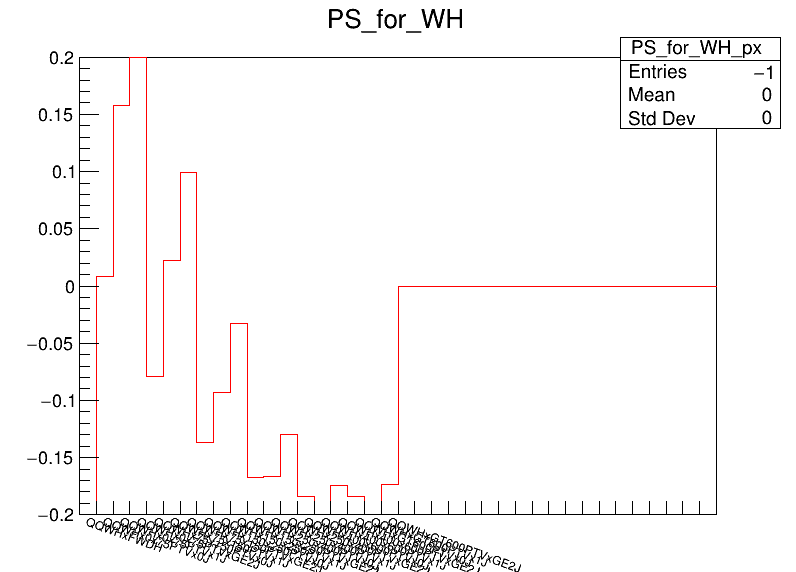

In [50]:

h1=hist_w_PDF.ProjectionX()
h1.SetLineColor(ROOT.kRed)
h1.GetYaxis().SetRangeUser(-0.2,0.2)
h1.Draw("hist")
c1.Draw()

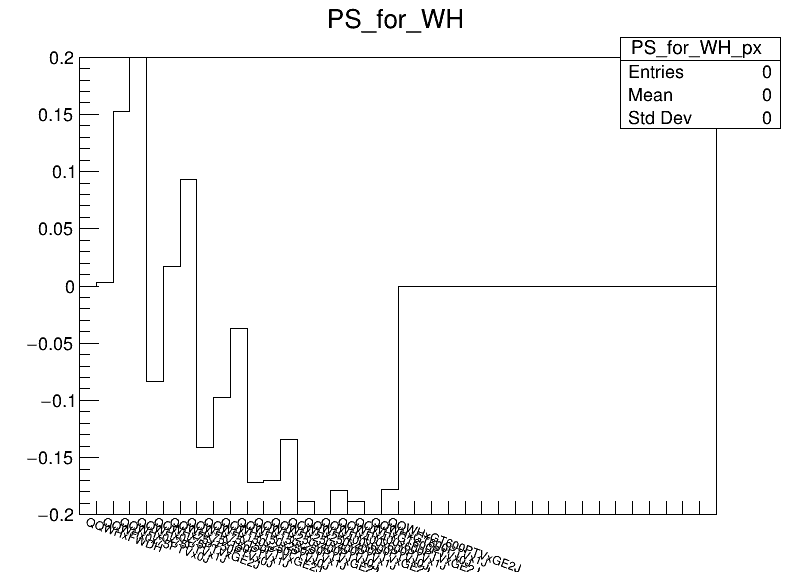

In [51]:
h2=hist_default.ProjectionX()
h2.SetLineColor(ROOT.kBlack)
h2.GetYaxis().SetRangeUser(-0.2,0.2)
h2.Draw("hist same")
c1.Draw()

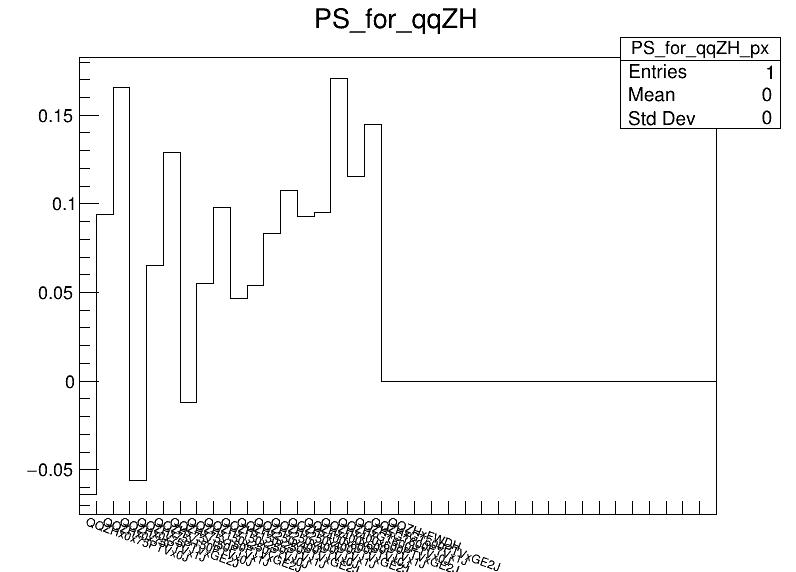

In [2]:
import ROOT

In [8]:
infile=ROOT.TFile.Open("CheckPS.root")
h1=infile.Get('nomYields')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


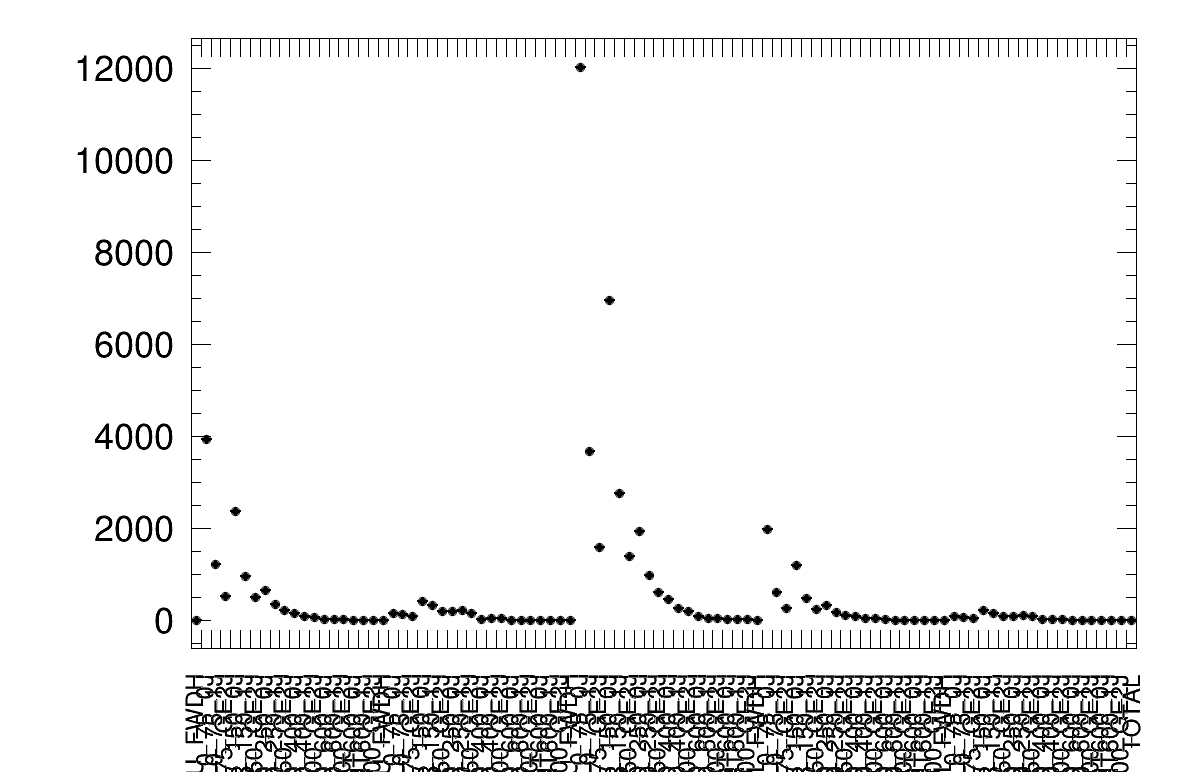

In [9]:
c1 = ROOT.TCanvas("c1","c1",1200,800)
h1.Draw()
# f = ROOT.TFile("Initial_XS_ade.root", "RECREATE")
# h1.Write()
# f.Close()

c1.Draw()

In [1]:
import ROOT

Welcome to JupyROOT 6.24/06


In [2]:
infile=ROOT.TFile.Open("CheckPS.root")

In [3]:
for keys in infile.GetListOfKeys():
    print(keys.GetName())

PSUncertainty
nomYields
altYields


In [4]:
hist=infile.Get('PSUncertainty')

Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file GG2HLL_PS.pdf has been created


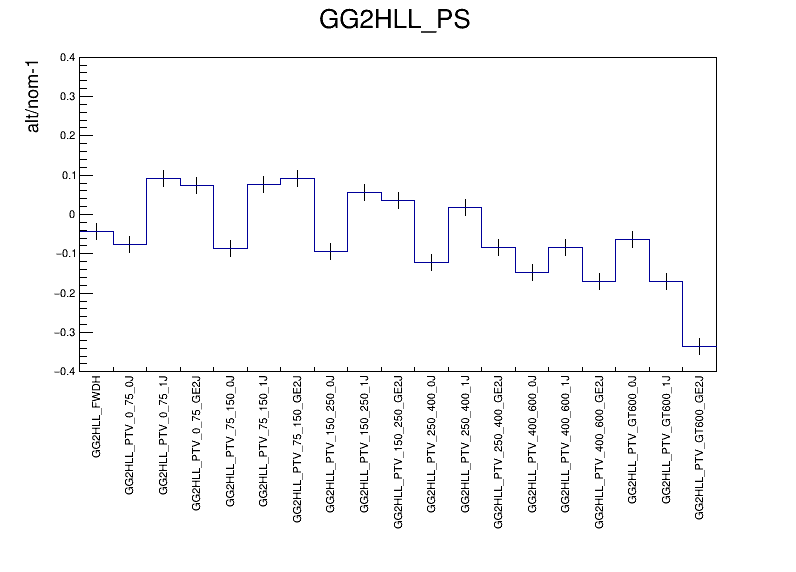

In [57]:
for_plot_Dict={}
for i in range(1, hist.GetNbinsX()+1):
    if "GG2HLL" in hist.GetXaxis().GetBinLabel(i):
        # print(hist.GetXaxis().GetBinLabel(i),hist.GetBinContent(i))
        for_plot_Dict[hist.GetXaxis().GetBinLabel(i)]=hist.GetBinContent(i)
h1 = ROOT.TH1F("h1", "Histogram from Dictionary", len(for_plot_Dict), 0, len(for_plot_Dict))

# Fill the histogram
for i, key in enumerate(for_plot_Dict):
    h1.SetBinContent(i+1, for_plot_Dict[key])
    # print(i+1,key,for_plot_Dict[key])
    h1.GetXaxis().SetBinLabel(i+1, key)

# Draw the histogram
c1 = ROOT.TCanvas("c1", "c1", 800, 600)
c1.SetBottomMargin(0.2)
# c1.SetLeftMargin(-0.1)
h1.SetStats(0)
h1.GetXaxis().SetLabelSize(0.02)
h1.GetYaxis().SetLabelSize(0.02)
h1.GetXaxis().SetLabelFont(42)  # Set the font of the labels
h1.GetXaxis().SetLabelSize(0.03)  # Set the size of the labels
h1.GetXaxis().LabelsOption("v")  # Make the labels vertical
h1.SetTickLength(0.01)
h1.SetTitle("GG2HLL_PS")
h1.SetMarkerSize(0.5)
h1.SetYTitle("alt/nom-1")
h1.SetTitleSize(0.02)
h1.SetMarkerStyle(2)
h1.Draw('E2 hist')
h1.SetMarkerSize(2)
h1.SetAxisRange(-0.4,0.40,"Y")
c1.SetBottomMargin(0.35)
# c1.SetTopMargin(0.35)
c1.Draw()
c1.SaveAs("GG2HLL_PS.pdf")

Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file GG2HNUNU_PS.pdf has been created


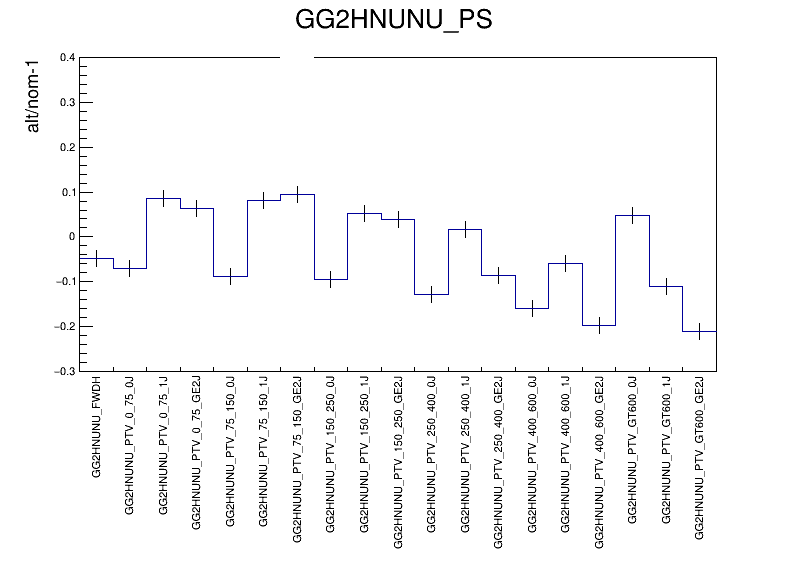

In [65]:
for_plot_Dict={}
for i in range(1, hist.GetNbinsX()+1):
    if "GG2HNUNU" in hist.GetXaxis().GetBinLabel(i):
        # print(hist.GetXaxis().GetBinLabel(i),hist.GetBinContent(i))
        for_plot_Dict[hist.GetXaxis().GetBinLabel(i)]=hist.GetBinContent(i)
h1 = ROOT.TH1F("h1", "Histogram from Dictionary", len(for_plot_Dict), 0, len(for_plot_Dict))

# Fill the histogram
for i, key in enumerate(for_plot_Dict):
    h1.SetBinContent(i+1, for_plot_Dict[key])
    # print(i+1,key,for_plot_Dict[key])
    h1.GetXaxis().SetBinLabel(i+1, key)

# Draw the histogram
c1 = ROOT.TCanvas("c1", "c1", 800, 600)
c1.SetBottomMargin(0.2)
# c1.SetLeftMargin(-0.1)
h1.SetStats(0)
h1.GetXaxis().SetLabelSize(0.02)
h1.GetYaxis().SetLabelSize(0.02)
h1.GetXaxis().SetLabelFont(42)  # Set the font of the labels
h1.GetXaxis().SetLabelSize(0.03)  # Set the size of the labels
h1.GetXaxis().LabelsOption("v")  # Make the labels vertical
h1.SetTickLength(0.01)
h1.SetTitle("GG2HNUNU_PS")
h1.SetMarkerSize(0.5)
h1.SetYTitle("alt/nom-1")
h1.SetTitleSize(0.02)
h1.SetMarkerStyle(2)
h1.Draw('E2 hist')
h1.SetMarkerSize(2)
h1.SetAxisRange(-0.3,0.4,"Y")
c1.SetBottomMargin(0.35)
c1.Draw()
c1.SaveAs("GG2HNUNU_PS.pdf")